In [170]:
import pandas as pd

In [171]:
df = pd.read_csv('~/Dropbox/github/binder-framework/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

In [172]:
df.columns

Index(['Period', 'Company Name', 'company contact', 'company email',
       'company phone', 'Address', 'City', 'State', 'Postcode', 'Industry',
       'Industry descr', 'Company Type', 'Current fulltime', 'Job created',
       'Job retain', 'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Gas Savings',
       'Cogen savings', 'Electric Savings', 'Borough', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'BIN', 'BBL',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object')

In [173]:
# 1. How many different companies are represented in the data set?

In [174]:
len(set(df['Company Name']))

787

In [175]:
df['Company Name'].nunique()

787

In [176]:
# 2. What is the total number of jobs created for businesses in Queens?

In [177]:
df['Job created'][df['Borough'] == 'QUEENS'].sum()

1196.0

In [178]:
# 3. How many different unique email domains names are there in the data set?

In [361]:
import numpy as np
df['company email'].apply(lambda x: x.split('@')[-1] if type(x) == str else np.nan).nunique()

601

In [362]:
domain_lengths = df['company email'].apply(lambda x: len(x.split('@')) if type(x) == str else 0)
domain_lengths.value_counts()

company email
2    2199
0     129
1      29
3       6
Name: count, dtype: int64

In [363]:
domain_1 = df['company email'].str.split('@').str[1]
domain_2 = df['company email'].str.split('@').str[-1]
domains = pd.DataFrame({'company email': df['company email'], 'domain_1': domain_1, 'domain_2': domain_2})
domains[(domain_1 != domain_2) & (~domain_2.isnull())]

,company email,domain_1,domain_2
33,Johnmdallcitymetal.com,NaN,Johnmdallcitymetal.com
36,officegreenfelds.com,NaN,officegreenfelds.com
84,billieannplastics.com,NaN,billieannplastics.com
100,jgewitrtzbrooklynnets.com,NaN,jgewitrtzbrooklynnets.com
139,"Computer Services Group, Inc.",NaN,"Computer Services Group, Inc."
221,pinagracesmarketplace.com,NaN,pinagracesmarketplace.com
385,adenovarebiologistics.com,NaN,adenovarebiologistics.com
426,promptapparel.com,NaN,promptapparel.com
535,benjanusproperty.com,NaN,benjanusproperty.com
536,urbangreenfurniture.com,NaN,urbangreenfurniture.com


In [187]:
# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [188]:
df2 = df.groupby('Neighborhood Tabulation Area (NTA) (2020)').agg(Number_of_businesses = ('Job created', 'size'), Total_Jobs_Created = ('Job created', 'sum'), Average_Total_Saving = ('Total Savings', 'mean'))
df3 = df2[df2["Number_of_businesses"] >= 5]
df3[['Total_Jobs_Created', 'Average_Total_Saving']]

,Total_Jobs_Created,Average_Total_Saving
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,16.0,10367.961795
BK0102,15.0,12599.753333
BK0103,0.0,19150.922857
BK0104,187.0,21158.253077
BK0201,0.0,15102.036364
...,...,...
QN1305,0.0,166379.352000
QN1306,0.0,21160.505200
SI0106,10.0,6338.252857


In [189]:
# 5. Save your result for the previous question as a CSV file.

In [190]:
df3.to_csv('~/Dropbox/github/binder-framework/Summaries.csv')

In [191]:
# Day 5

In [192]:
# 2. Using the same data set and results that you were working with in the pandas action items section (Day 4), create a

In [193]:
##    scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [229]:
df4 = df[df['Job created'] < 10000]

In [233]:
df4.columns

Index(['Period', 'Company Name', 'company contact', 'company email',
       'company phone', 'Address', 'City', 'State', 'Postcode', 'Industry',
       'Industry descr', 'Company Type', 'Current fulltime', 'Job created',
       'Job retain', 'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Gas Savings',
       'Cogen savings', 'Electric Savings', 'Borough', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'BIN', 'BBL',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)',
       'Average Savings'],
      dtype='object')

In [235]:
df4['Average Savings'] = df4['Total Savings'] / df4['Job created']

/var/folders/c2/h_dgyyk55zv2_mqdy1pnb79m0000gn/T/ipykernel_88348/2299585170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Average Savings'] = df4['Total Savings'] / df4['Job created']


In [211]:
#df5 = pd.DataFrame({'Job created': df4['Job created'], 'Average Savings': df4['Total Savings'] / df4['Job created']})

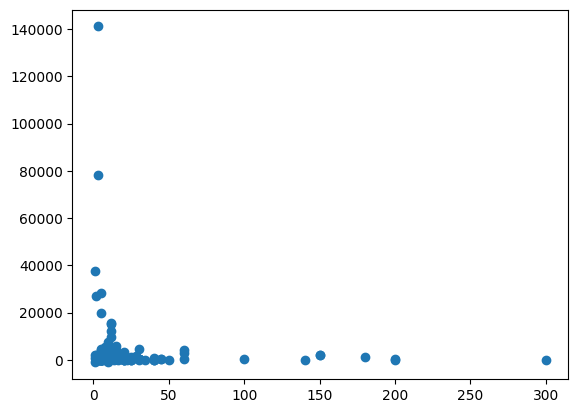

In [237]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(df4['Job created'], df4['Average Savings'])

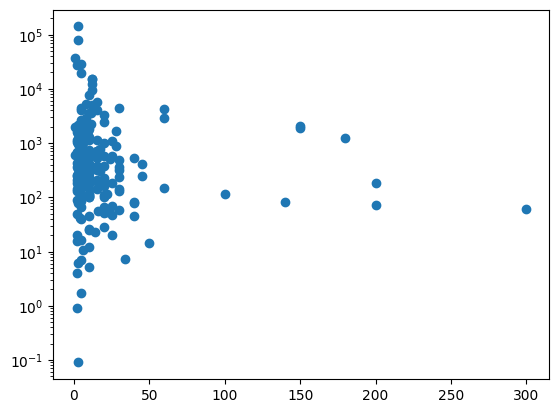

In [238]:
fig2, ax2 = plt.subplots()
ax2.scatter(df4['Job created'], df4['Average Savings'])
ax2.set_yscale("log")

In [ ]:
##    histogram of the log of the average total savings.

(array([ 1.,  0.,  0.,  1.,  1.,  3.,  4.,  8., 10., 22., 32., 40., 33.,
        30., 17.,  9.,  4.,  3.,  1.,  2.]),
 array([-1.04575749, -0.73599006, -0.42622262, -0.11645519,  0.19331224,
         0.50307968,  0.81284711,  1.12261455,  1.43238198,  1.74214941,
         2.05191685,  2.36168428,  2.67145171,  2.98121915,  3.29098658,
         3.60075402,  3.91052145,  4.22028888,  4.53005632,  4.83982375,
         5.14959118]),
 <BarContainer object of 20 artists>)

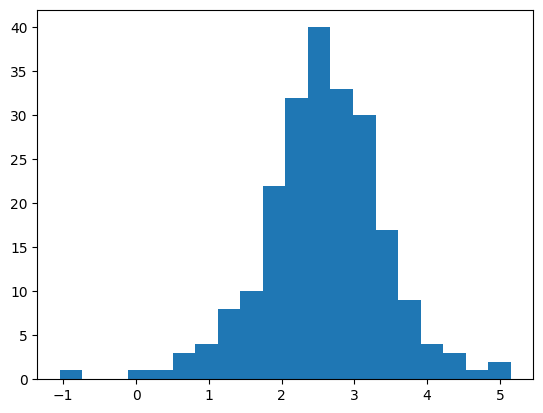

In [241]:
df5 = df4[df4['Average Savings'] > 0]
fig3, ax3 = plt.subplots()
ax3.hist(np.log10(df5['Average Savings']), bins = 20)

In [ ]:
##    line plot of the total jobs created for each month.

In [269]:
df4['year_month'] = pd.to_datetime(df4['Effective Date']).dt.to_period('M')

/var/folders/c2/h_dgyyk55zv2_mqdy1pnb79m0000gn/T/ipykernel_88348/459807241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['year_month'] = pd.to_datetime(df4['Effective Date']).dt.to_period('M')


In [270]:
df6 = df4.groupby('year_month').agg(Total_Jobs_created = ('Job created', 'sum'))
df6

,Total_Jobs_created
year_month,
1993-02,25.0
1993-04,10.0
1994-04,15.0
1998-10,17.0
2001-04,20.0
2002-10,5.0
2003-07,5.0
2003-11,40.0
2004-03,50.0


<Axes: xlabel='year_month'>

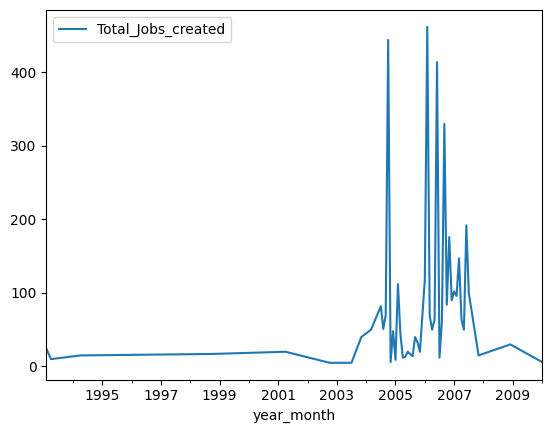

In [271]:
df6.plot.line()